In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Abre o arquivo
pkl_file = open('fingerprint_data.pkl', 'rb')
x_train, x_test, y_train, y_test = pickle.load(pkl_file)

# Reshape para o formato correto
x_train = x_train.reshape(x_train.shape[0], 372, 312, 1)
x_test = x_test.reshape(x_test.shape[0], 372, 312, 1)
input_shape = (372, 312, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normaliza
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Tamanho do conjunto de treinamento', x_train.shape[0])
print('Tamanho do conjunto de teste', x_test.shape[0])

x_train shape: (48, 372, 312, 1)
Tamanho do conjunto de treinamento 48
Tamanho do conjunto de teste 12


Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(10,10), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(7,7)))
model.add(Conv2D(64, kernel_size=(4,4), input_shape=(int(input_shape[0]/2), int(input_shape[1]/2),1)))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(6,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 363, 303, 32)      3232      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 40, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1966336   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [3]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
48/48 [==============================] - 5s 107ms/step - loss: 1.7821 - accuracy: 0.1667
Epoch 2/10
48/48 [==============================] - 4s 90ms/step - loss: 1.9629 - accuracy: 0.2083
Epoch 3/10
48/48 [==============================] - 5s 98ms/step - loss: 1.5920 - accuracy: 0.3333
Epoch 4/10
48/48 [==============================] - 4s 94ms/step - loss: 1.4961 - accuracy: 0.5000
Epoch 5/10
48/48 [==============================] - 4s 92ms/step - loss: 1.3736 - accuracy: 0.5625
Epoch 6/10
48/48 [==============================] - 4s 90ms/step - loss: 1.1692 - accuracy: 0.8750
Epoch 7/10
48/48 [==============================] - 4s 91ms/step - loss: 1.2264 - accuracy: 0.4375
Epoch 8/10
48/48 [==============================] - 4s 90ms/step - loss: 1.0183 - accuracy: 0.6667
Epoch 9/10
48/48 [==============================] - 4s 92ms/step - loss: 0.7849 - accuracy: 0.8750
Epoch 10/10
48/48 [==============================] - 5s 95ms/step - loss: 0.6087 - accuracy: 0.9375


In [4]:
# Avaliação do modelo
acc = model.evaluate(x_test, y_test)
print('Acurácia = ', acc[1]*100, '%')

12/12 [==============================] - 1s 46ms/step
Acurácia =  100.0 %


Indivíduo: 2


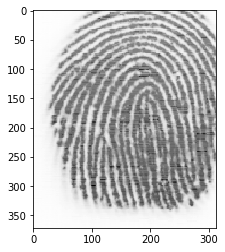

In [6]:
# Avaliação individual

image_index = 4
plt.imshow(x_test[image_index].reshape(372, 312),cmap='gray')
pred = model.predict(x_test[image_index].reshape(1, 372, 312, 1))
print('Indivíduo:', pred.argmax())

### Ignore o modelo 2!

In [10]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(10,10), input_shape=input_shape))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, kernel_size=(7,7), input_shape=(int(input_shape[0]/2), int(input_shape[1]/2),1)))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, kernel_size=(4,4), input_shape=(int(input_shape[0]/2), int(input_shape[1]/2),1)))
model2.add(MaxPooling2D())
model2.add(Conv2D(128, kernel_size=(4,4), input_shape=(int(input_shape[0]/2), int(input_shape[1]/2),1)))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(1024, activation=tf.nn.relu))
model2.add(Dropout(0.2))
model2.add(Dense(6,activation=tf.nn.softmax))
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 363, 303, 32)      3232      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 181, 151, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 175, 145, 64)      100416    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 87, 72, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 84, 69, 64)        65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 42, 34, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 39, 31, 128)      

In [11]:
# Avaliação do modelo
acc = model2.evaluate(x_test, y_test)
print('Acurácia = ', acc[1]*100, '%')

5/5 [==============================] - 1s 215ms/step
Acurácia =  20.000000298023224 %
